In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [30]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Data Visulisation

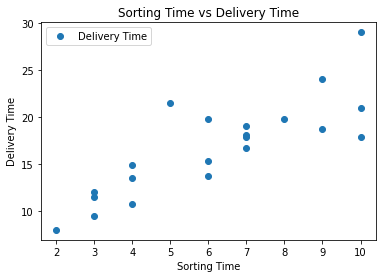

In [32]:
dataset.plot(x='Sorting Time', y='Delivery Time', style='o') 
plt.title('Sorting Time vs Delivery Time')  
plt.xlabel('Sorting Time') 
plt.ylabel('Delivery Time')
plt.show()

In [33]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(dataset['Sorting Time'], dataset['Delivery Time'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(dataset['Sorting Time'], dataset['Delivery Time'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.826
Spearmans correlation: 0.806


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


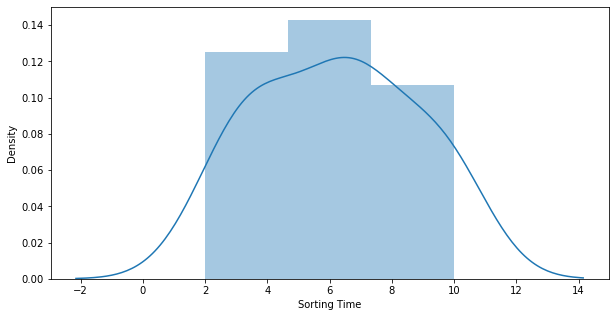

In [34]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(dataset['Sorting Time'])
plt.show() 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


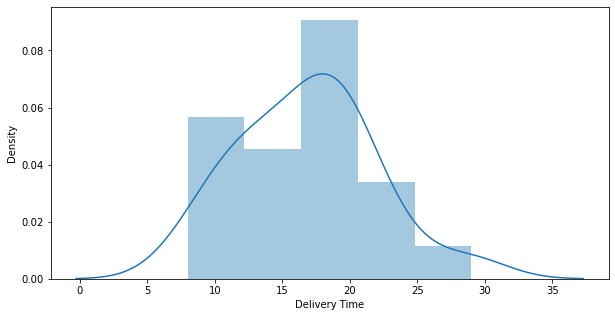

In [35]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(dataset['Delivery Time'])
plt.show()

# Linear Regression with Logarithmic Transformation

y= a+ b* log(x)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [49]:
# Input dataset
X_log = np.log(dataset['Sorting Time'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = dataset['Delivery Time'].values.reshape(-1,1)

In [50]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [51]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [52]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-0.31865575]
Co-efficient Value of Log Model is :  [[10.09551654]]


In [53]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[22.92713014],
       [19.32631235],
       [13.6767019 ],
       [13.6767019 ],
       [22.92713014]])

In [54]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


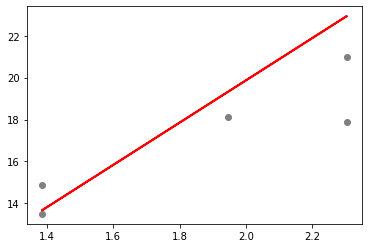

In [55]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 1.910114526185978
Mean Squared Error: 6.388886730349971
Root Mean Squared Error: 2.5276247210276233
R^2 Score :           0.08089653229737481
